In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from funcs.models import model_ND

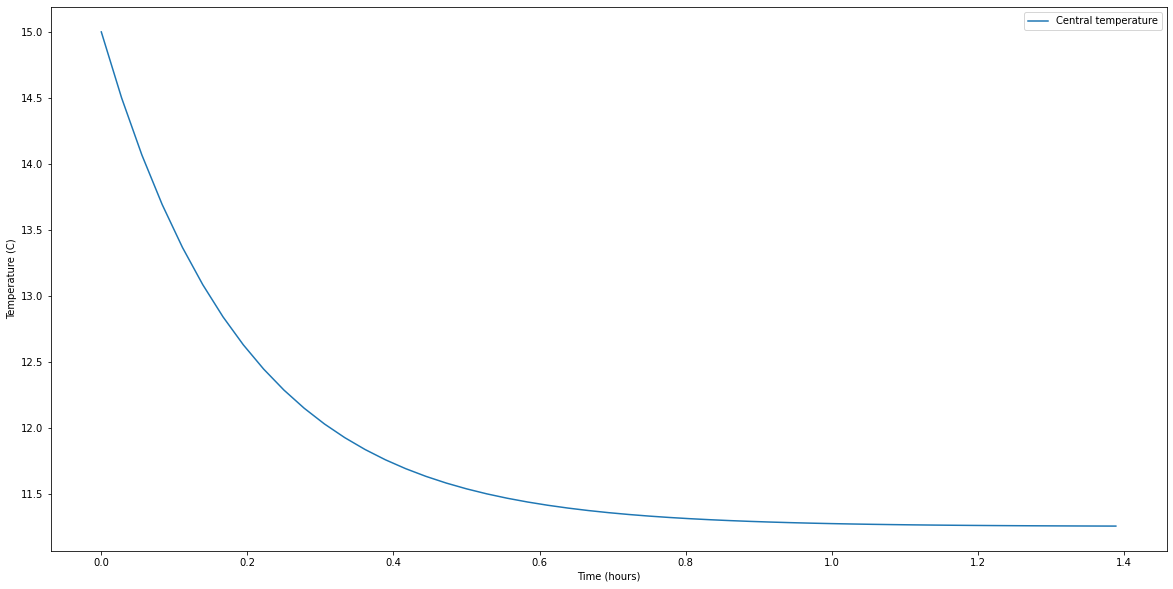

In [9]:
# Simplest example, 
k = 6e5
c = 800.0
T = 15.0
T_out = 10
heatinput = 1000

# Initialise class with system parameters
sys_nd = model_ND(k, c, T, T_out, heatinput)

timestep = 60
iterations = 50

# Run simulation. This recreates simple_model.ipynb showing that our generalised model works.
times = np.linspace(0, 5e3, iterations+1)
Ts, Qs = sys_nd.run(times=times)
Ts = Ts.flatten()

In [35]:
def f(times, k_est, c_est, T_est):

    heatinput, T_out, iterations = [1000, 10, 50]
    Ts_est = [T_est]
    
    dt = np.diff(times)
    for i in range(iterations):
        net_heatflow = heatinput - c_est * (T_est - T_out)
        T_est += (net_heatflow / k_est) * dt[i]
        Ts_est.append(T_est)
        
    Ts_est = np.array(Ts_est)
    
    return Ts_est

In [63]:
from scipy.optimize import curve_fit

In [69]:
popt, pcov = curve_fit(f, times, Ts, p0=[5e5, 1000, 5])

In [70]:
print('Estimated parameters:\nk\t\t{:.2f}\nc\t\t{:.2f}\nT_initial\t{}'.format(*popt))

Estimated parameters:
k		600000.00
c		800.00
T_initial	15.0


We are able to recover the desired heat capacity, thermal conductivity and initial temperature even with pretty bad intial guesses. However, need to ensure intial guesses are at least on the right order of magnitude.